In [1]:
# Import dictionaries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import linregress

from stop_words import get_stop_words
stop_words = get_stop_words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
# Pull in lyric data
lyric_file = "billboard_lyrics_1964-2015.csv"
lyric_df = pd.read_csv(lyric_file, skipinitialspace=False, encoding="ISO-8859-1")
lyric_df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [3]:
# Check field count
lyric_df.count()

Rank      5100
Song      5100
Artist    5100
Year      5100
Lyrics    4913
Source    4913
dtype: int64

In [4]:
# Mark empty spaces and remove blank ones
lyric_noblanks = lyric_df.replace("  ","NAN")
lyric_noblanks = lyric_noblanks.replace("","NAN")
lyric_noblanks = lyric_noblanks.dropna(how="any")
lyric_noblanks.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,NAN,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [5]:
# Check count again, knowing NAN is still present
lyric_noblanks.count()

Rank      4913
Song      4913
Artist    4913
Year      4913
Lyrics    4913
Source    4913
dtype: int64

In [41]:
# Variables for holding sentiments
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
counter = 0

# Variables for word analysis
word_count_list = []
counter_wc = 0
word_repetition = []
word_repeated = []
word_counts = []
unique_word_count = []
total_word_count = []

# Loop through lyrics
for lyric in lyric_noblanks["Lyrics"]:
    
    word_counter_list = []
    
    # Run Vader Analysis 
    results = analyzer.polarity_scores(lyric)
    
    # Store Vader Analysis Results
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    
    # Append Vader Analysis Results
    compound_list.append(compound)
    positive_list.append(pos)
    negative_list.append(neg)
    neutral_list.append(neu)
    
    #  Word List
    word_split = lyric.split(" ")
    
    # Word Count
    word_count = len(word_split)
    word_count_list.append(word_count)
    
    # Word Repetition
    total_number_words = len(word_split)
    unique_words = set(word_split)
    unique_filtered = [word for word in unique_words if word not in stop_words]
    unique_words = list(unique_words)
    word_counter_list = []

    for x in unique_filtered:
        word_counter = 0
        for y in word_split:
            if x==y:
                word_counter += 1
        word_counter_list.append(word_counter)
     
    mode = max(word_counter_list)
    mode_index = word_counter_list.index(max(word_counter_list))
    mode_word = unique_filtered[mode_index]
    word_count = len(unique_filtered)
    
    word_repetition.append(mode)
    word_repeated.append(mode_word)
    word_counts.append(unique_filtered)
    unique_word_count.append(word_count)
    total_word_count.append(total_number_words)
    
    counter +=1
print(f'success: {counter}')

success: 4913


In [7]:
lyric_add = lyric_noblanks
lyric_add["Sentiment"] = compound_list
lyric_add["Word Count"] = word_count_list
lyric_add["Repetition"] = word_repetition
lyric_add["Word Count"] = total_word_count
lyric_add["Mode Word"] = word_repeated

lyric_add.head()

,Rank,Song,Artist,Year,Lyrics,Source,Sentiment,Word Count,Repetition,Mode Word
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,-0.9946,128,18,wooly
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,0.2624,206,8,help
2,3,i cant get no satisfaction,the rolling stones,1965,NAN,1.0,0.0000,1,1,NAN
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,-0.9607,154,15,got
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,0.9958,234,12,feelin


In [49]:
# Filter out songs with less than 50 words
lyric_filter = lyric_add.loc[lyric_add["Word Count"] > 50,:]

lyric_filter.to_csv("Output/lyric_filter.csv", index=False)

lyric_filter.head()

,Rank,Song,Artist,Year,Lyrics,Source,Sentiment,Word Count,Repetition,Mode Word
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,-0.9946,128,18,wooly
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,0.2624,206,8,help
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,-0.9607,154,15,got
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,0.9958,234,12,feelin
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,0.9249,241,15,downtown


In [51]:
# Analysis for which is more popular, positive or negative songs
# Positive is >0.75 and Negative is <-0.75
bins = [0, 1970, 1980, 1990, 2000, 2010, 2016]
group_names = ['<1970', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010+']

sentiment_analysis_decade = lyric_filter.copy()
sentiment_analysis_decade["Decade"] = pd.cut(sentiment_analysis_decade["Year"], bins, labels=group_names)

pos_songs = []
neg_songs = []
tot_songs = []

for x in group_names:
    decade_count = sentiment_analysis_decade.loc[sentiment_analysis_decade["Decade"] == x]
    
    count_pos = decade_count.loc[decade_count["Sentiment"] > 0.75]
    pos_songs.append(len(count_pos["Sentiment"]))
    
    count_neg = decade_count.loc[decade_count["Sentiment"] < -0.75]
    neg_songs.append(len(count_neg["Sentiment"]))
    
    tot_songs.append(len(decade_count["Sentiment"]))

percent_pos = [a/b*100 for a,b in zip(pos_songs,tot_songs)]
percent_neg = [a/b*100 for a,b in zip(neg_songs,tot_songs)]
percent_neu = [100-a-b for a,b in zip(percent_pos,percent_neg)]

pos_analysis_df = pd.DataFrame({"Decade": group_names, "Percent Positive": percent_pos, "Percent Negative": percent_neg, "Percent Neutral": percent_neu})


pos_analysis_df = pos_analysis_df[["Decade","Percent Positive", "Percent Negative","Percent Neutral"]]

pos_analysis_table = pos_analysis_df.copy()
pos_analysis_table["Percent Positive"] = pos_analysis_table["Percent Positive"].map("{:.1f}%".format)
pos_analysis_table["Percent Negative"] = pos_analysis_table["Percent Negative"].map("{:.1f}%".format)
pos_analysis_table["Percent Neutral"] = pos_analysis_table["Percent Neutral"].map("{:.1f}%".format)


pos_analysis_table.to_excel("Output/positivity_analysis_table.xlsx", index=False)
pos_analysis_df

,Decade,Percent Positive,Percent Negative,Percent Neutral
0,<1970,66.909091,16.727273,16.363636
1,1970-1979,69.656700,15.614618,14.728682
2,1980-1989,67.225131,18.324607,14.450262
3,1990-1999,66.279070,18.604651,15.116279
4,2000-2009,64.814815,24.691358,10.493827
5,>2010,61.836735,26.326531,11.836735


      Decade  Percent Positive  Percent Negative  Percent Neutral
0      <1970         66.909091         16.727273        16.363636
1  1970-1979         69.656700         15.614618        14.728682
2  1980-1989         67.225131         18.324607        14.450262
3  1990-1999         66.279070         18.604651        15.116279
4  2000-2009         64.814815         24.691358        10.493827
5      >2010         61.836735         26.326531        11.836735


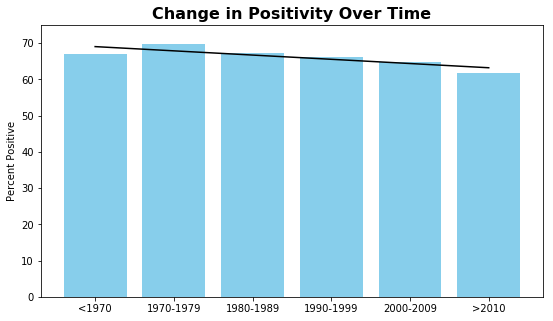

In [64]:
x_axis=np.arange(6)
(slope, intercept, _, _, _) = linregress(np.arange(6), pos_analysis_df["Percent Positive"])
fit = slope * x_axis + intercept

pos_plot = pos_analysis_df[["Decade","Percent Positive"]]

fig, ax = plt.subplots()

ax.bar(x_axis,pos_plot["Percent Positive"], color="skyblue")
ax.plot(x_axis,fit, color="black")

plt.rcParams["figure.figsize"] = [9,5]
plt.title("Change in Positivity Over Time", fontsize=16, fontweight="bold")
plt.ylabel("Percent Positive")

plt.xticks(np.arange(6),group_names)
plt.ylim(0,75,5)

plt.savefig("Output/positivity_over_time.png")
print(pos_analysis_df)
plt.show()

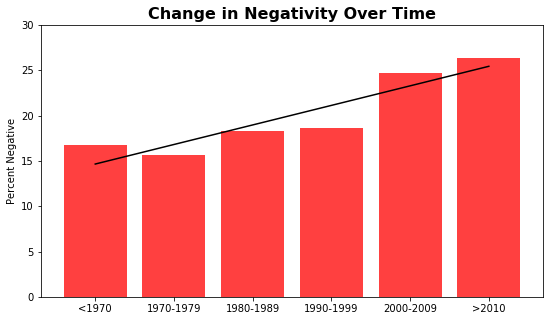

In [65]:
x_axis=np.arange(6)
(slope, intercept, _, _, _) = linregress(np.arange(6), pos_analysis_df["Percent Negative"])
fit = slope * x_axis + intercept

neg_plot = pos_analysis_df[["Decade","Percent Negative"]]

fig, ax = plt.subplots()

ax.bar(x_axis,neg_plot["Percent Negative"], color="red", alpha=0.75)
ax.plot(x_axis,fit, color="black")

plt.rcParams["figure.figsize"] = [9,5]

plt.title("Change in Negativity Over Time", fontsize=16, fontweight="bold")
plt.ylabel("Percent Negative")

plt.xticks(np.arange(6),group_names)
plt.ylim(0,30,5)

plt.savefig("Output/negativity_over_time.png")
plt.show()

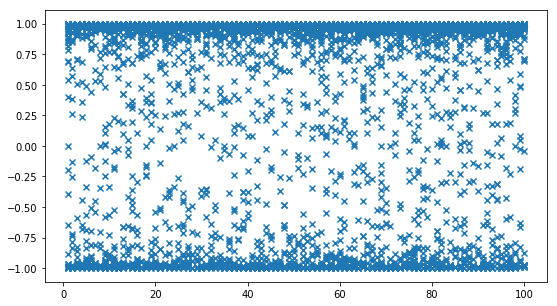

In [45]:
# Plot of Sentiment Analysis
plt.scatter(lyric_filter["Rank"], lyric_filter["Sentiment"], marker="x")
plt.rcParams["figure.figsize"] = [9,5]

plt.savefig("Output/vader_analysis_top_100.png")
plt.show()

In [13]:
# Sentiment by decade

bins = [0, 1970, 1980, 1990, 2000, 2010, 2016]
group_names = ['<1970', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010+']

sentiment_decade = lyric_filter.copy()
sentiment_decade["Decade"] = pd.cut(sentiment_decade["Year"], bins, labels=group_names)
sentiment_decade = sentiment_decade.groupby(["Decade"])
decade_average = sentiment_decade["Sentiment"].mean()

sentiment_decade = pd.DataFrame({"Average": decade_average})

sentiment_decade

,Average
Decade,
<1970,0.497803
1970-1979,0.539768
1980-1989,0.483838
1990-1999,0.486916
2000-2009,0.397618
2010+,0.347205


In [33]:
# Word Repetion Analysis

rep_ave = lyric_filter["Repetition"].mean()
rep_med = lyric_filter["Repetition"].median()
rep_max = lyric_filter["Repetition"].max()

rep_max_df = lyric_filter.loc[lyric_filter["Repetition"]==rep_max]
rep_max_lyrics = rep_max_df["Lyrics"]


sorted_rep = sorted(lyric_filter["Repetition"])
lq_index = len(sorted_rep) // 4
lq = sorted_rep[lq_index]
uq_index = lq_index*3
uq = sorted_rep[uq_index]
quartile_range = uq - lq


rep_df = pd.DataFrame({"Mean": rep_ave, "Median": rep_med, "Q1": lq, "Q3": uq, "Quartile Range": quartile_range}, index=[0])

rep_max_df

,Rank,Song,Artist,Year,Lyrics,Source,Sentiment,Word Count,Repetition,Mode Word,Words Per Minute
894,95,yes we can can,the pointer sisters,1973,nows the time for all good men to get together...,3.0,0.9996,897,167,can,256.285714


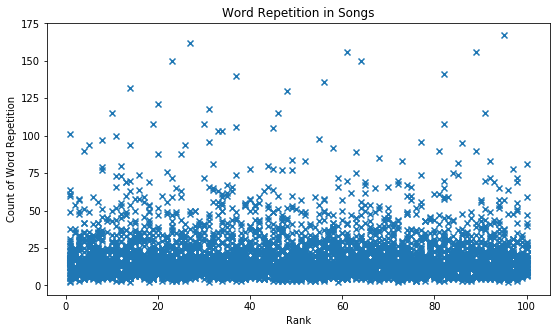

In [52]:
# Plot of repetition
plt.scatter(lyric_filter["Rank"], lyric_filter["Repetition"], marker="x")
plt.rcParams["figure.figsize"] = [9,5]

plt.title("Word Repetition in Songs")
plt.xlabel("Rank")
plt.ylabel("Count of Word Repetition")

plt.savefig("Output/word_repetition_top100.png")
plt.show()

In [60]:
# Word Repetition by Decade
bins = [0, 1970, 1980, 1990, 2000, 2010, 2016]
group_names = ['<1970', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010+']

average_rep = []

rep_decade = lyric_filter.copy()
rep_decade["Decade"] = pd.cut(rep_decade["Year"], bins, labels=group_names)

for bin in group_names:
    filtered_df = rep_decade.loc[rep_decade["Decade"] == bin]
    average_rep.append(filtered_df["Repetition"].mean())
    
rep_per_decade = pd.DataFrame({"Decade": group_names, "Average Repetition": average_rep})
rep_per_decade = rep_per_decade[["Decade","Average Repetition"]]
rep_per_decade

,Decade,Average Repetition
0,<1970,13.936364
1,1970-1979,15.248062
2,1980-1989,17.663874
3,1990-1999,18.953488
4,2000-2009,24.172840
5,>2010,22.981633


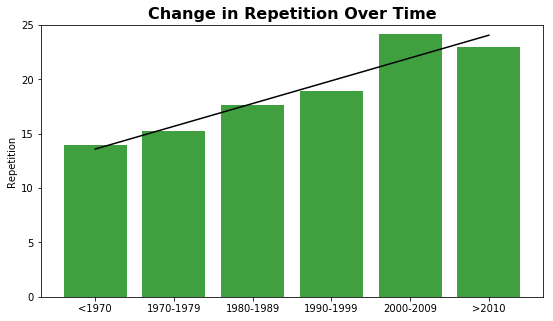

In [66]:
x_axis=np.arange(6)
(slope, intercept, _, _, _) = linregress(np.arange(6), rep_per_decade["Average Repetition"])
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

ax.bar(x_axis,rep_per_decade["Average Repetition"], color="green", alpha=0.75)
ax.plot(x_axis,fit, color="black")

plt.rcParams["figure.figsize"] = [9,5]

plt.title("Change in Repetition Over Time", fontsize=16, fontweight="bold")
plt.ylabel("Repetition")

plt.xticks(np.arange(6),group_names)
plt.ylim(0,25,5)

plt.savefig("Output/negativity_over_time.png")
plt.show()

In [53]:
# Add Song Length Component
song_length = 3.5

lyric_length = lyric_filter
lyric_length["Words Per Minute"] = lyric_length["Word Count"]/song_length

wpm_ave = lyric_length["Words Per Minute"].mean()
wpm_med = lyric_length["Words Per Minute"].median()

sorted_wpm = sorted(lyric_length["Words Per Minute"])
lq_index = len(sorted_wpm) // 4
lq = sorted_wpm[lq_index]
uq_index = lq_index*3
uq = sorted_wpm[uq_index]
quartile_range = uq - lq


wpm_df = pd.DataFrame({"Mean": wpm_ave, "Median": wpm_med, "Q1": lq, "Q3": uq, "Quartile Range": quartile_range}, index=[0])
wpm_df

C:\Users\kimberly\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Mean,Median,Q1,Q3,Quartile Range
0,95.77818,84.285714,62.571429,116.571429,54.0


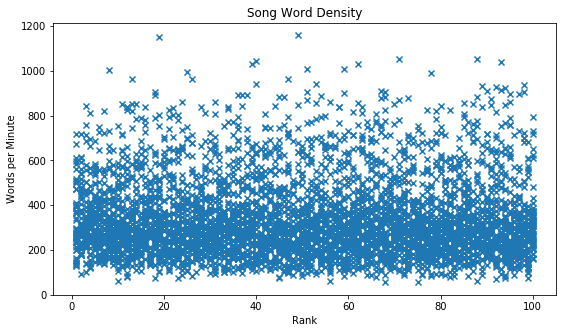

In [19]:
# Plot of words per minute
plt.scatter(lyric_length["Rank"], lyric_length["Word Count"], marker="x")
plt.rcParams["figure.figsize"] = [9,5]

plt.title("Song Word Density")
plt.xlabel("Rank")
plt.ylabel("Words per Minute")

plt.show()

In [20]:
# Word Count by Decade
bins = [0, 1970, 1980, 1990, 2000, 2010, 2016]
group_names = ['<1970', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010+']

wc_decade = lyric_filter.copy()
wc_decade["Decade"] = pd.cut(wc_decade["Year"], bins, labels=group_names)
wc_decade = wc_decade.groupby(["Decade"])
decade_average = wc_decade["Word Count"].mean()

wc_decade = pd.DataFrame({"Average": decade_average})

wc_decade

,Average
Decade,
<1970,206.223636
1970-1979,238.374308
1980-1989,285.500524
1990-1999,373.095137
2000-2009,473.008230
2010+,408.973469
